In [126]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('crimes.csv')
ds = dataset.drop(['crime', 'id'], axis=1)

# Exclude id, description and label
X = ds.iloc[:, :-1].values

# Get only label
y = ds['categoria'].values

# print(X.shape, y.shape)
# print(X[:1])
# ds.head(1)


In [127]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 30, y = 30, input_len = 26, sigma = 1.0, learning_rate = 0.3)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)



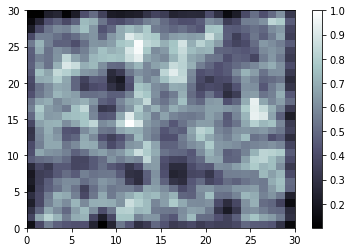

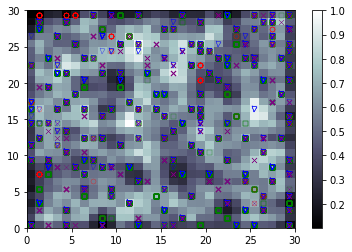

In [125]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's','v','x']
colors = ['r', 'g', 'b', 'purple']
# red - roubo
# green - lesao
# blue - drogas
# purple - estupro
show()

pcolor(som.distance_map().T)
colorbar()
i = 0
for x in X:
    w = som.winner(x)
    ind = int(y[i])
    posx = ind % 2
    posy = 0 if ind < 2 else 1
    
    plot(w[0] + 0.4,
         w[1] + 0.4,
         markers[ ind ],
         markeredgecolor = colors[ ind ],
         markerfacecolor = 'None',
         markersize = 5,
         markeredgewidth = 0.3)
    i += 1

show()

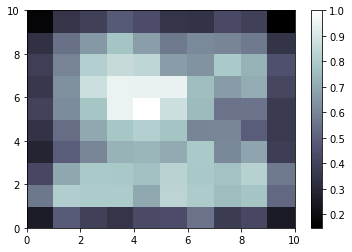

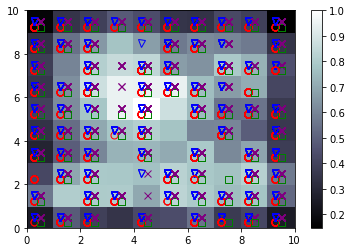

In [110]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's','v','x']
colors = ['r', 'g', 'b', 'purple']
# red - roubo
# green - lesao
# blue - drogas
# purple - estupro
show()

pcolor(som.distance_map().T)
colorbar()
i = 0
for x in X:
    w = som.winner(x)
    ind = int(y[i])
    posx = ind % 2
    posy = 0 if ind < 2 else 1
    
    plot(w[0] + 0.25 + 0.25*posx,
         w[1] + 0.25 + 0.25*posy,
         markers[ ind ],
         markeredgecolor = colors[ ind ],
         markerfacecolor = 'None',
         markersize = 7,
         markeredgewidth = 1)
    i += 1

show()

## Comentários

Os dados são do dataset são apenas, localização e o mês de ocorrência. Dois dados que foram categorizados para serem processados.

Os quatro símbolos representam:
* retangulo: roubo/furto
* circulo: lesao/homicidio
* triangulo: drogas
* x: estupro

De acordo com esse post https://towardsdatascience.com/self-organizing-maps-ff5853a118d4
SOM é interessante de ser usado como ferramenta de análise exploratória dos dados.
Os quadrados claros são pontos de transição entre os clusters, e os clusters estão nos quadrados escuros.

Visualizando em um mapa 10x10, todas as categorias se encontram nas bordas, estupro se apresenta em uma linha de transição, talvez demonstrando um comportamento.

Visualizando em um mapa 30x30, alguns casos de estupro ainda aparecem em regiões mais claras. Drogas e Roubo/Furto aparecem mais vezes juntos, lesões se separou mais dos outros.


OBS.: Os dados estão igualmente distribuídos quanto ao meses, e as categorias. Ou seja, mesmo numero de ocorrencias para cada categoria durante os meses.
